In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

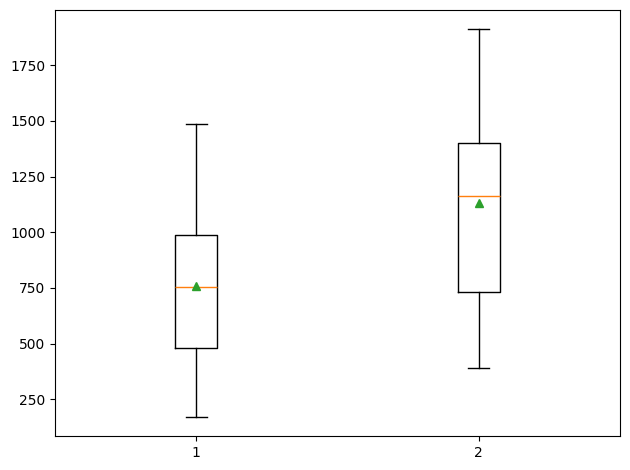

In [17]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

# :sfig

fig, axis = plt.subplots()
#plotting code:

axis.boxplot(a, showmeans=True)
axis.boxplot(c, showmeans=True, positions=[2])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# oranzine linija yra mediana

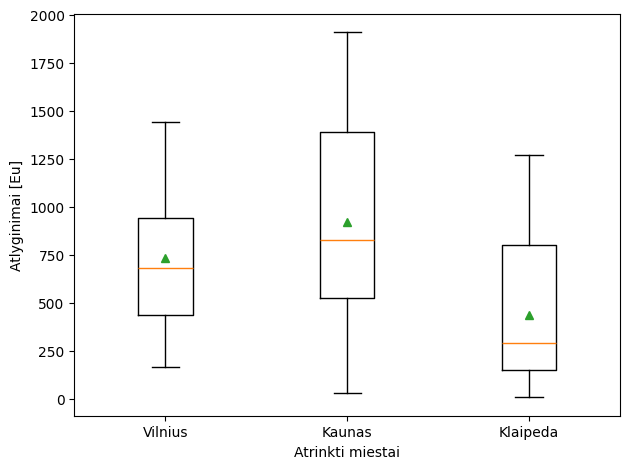

In [21]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data = [a,c,d]
# :sfig

fig, axis = plt.subplots()
#plotting code:

axis.boxplot(data, showmeans=True)  # pridejom data kintamaji su 3 argumentais

axis.set_ylabel("Atlyginimai [Eu]")
axis.set_xlabel("Atrinkti miestai")
axis.set_xticklabels(['Vilnius', 'Kaunas', 'Klaipeda'])


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [25]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.

life = pd.read_csv('life-exp.csv')
life

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1955,29.854
1,Africa,NaN,1955,38.783
2,Albania,ALB,1955,57.007
3,Algeria,DZA,1955,43.916
4,American Samoa,ASM,1955,64.985
...,...,...,...,...
15790,Western Sahara,ESH,2019,70.263
15791,World,OWID_WRL,2019,72.584
15792,Yemen,YEM,2019,66.125
15793,Zambia,ZMB,2019,63.886


In [24]:
gov = pd.read_csv('gov-forms.csv')
gov

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,Republic,Executive,Presidency is independent of legislature
...,...,...,...,...
190,Venezuela,Republic,Executive,Presidency is independent of legislature
191,Vietnam,Republic,Executive,Power constitutionally linked to a single poli...
192,Yemen,Provisional,NONE,No constitutionally-defined basis to current r...
193,Zambia,Republic,Executive,Presidency is independent of legislature


In [54]:
lifegov = pd.merge(left=life, right=gov, left_on='Entity', right_on='Name', how='inner')
lifegov.head()

# miestaiSuApskritimis =  pd.merge(left=miestai, right=apskritys, left_on='Apskritis', right_on='Kodas', how='inner')
# miestaiSuApskritimis.head()

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,AND,1955,66.111,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,AGO,1955,36.315,Angola,Republic,Executive,Presidency is independent of legislature


In [55]:
# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?
#lifegov[['Constitutional form', 'Life expectancy']].groupby(by='Constitutional form').mean(numeric_only=True).reset_index()    # ir sita veikianti eilute su panasiu rezultatu
#mgr = lifegov.groupby(by='Constitutional form')
#mgr.groups.keys() 
#mgr.mean(numeric_only=True).reset_index() 
#su query
#lifegov = lifegov.query('Year > 2018')
lifegov.query('Year > 2018')[['Constitutional form', 'Life expectancy']].groupby(by='Constitutional form').mean(numeric_only=True).reset_index()
# dedant query apsiribojame eilutes ('Year > 2018') ir stulpelius ['Constitutional form', 'Life expectancy'] ir toliau viskas ka dareme pries tai 

,Constitutional form,Life expectancy
0,Absolute monarchy,72.262000
1,Constitutionalmonarchy,77.183368
2,Provisional,64.171333
3,Republic,71.958209


In [41]:
lifegov.columns   #isvardina visus stulpelius esancius lenteleje

Index(['Entity', 'Code', 'Year', 'Life expectancy', 'Name',
       'Constitutional form', 'Head of state',
       'Basis of executive legitimacy'],
      dtype='object')

In [102]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head

#lifegov.sort_values(by='Life expectancy').tail(3)
life2019trumpiausiai = lifegov.query('Year == 2019')[['Entity', 'Life expectancy']].sort_values(by="Life expectancy")
trumpiausi = life2019trumpiausiai.head(3)
trumpiausi

# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis

,Entity,Life expectancy
11679,Central African Republic,53.283
11680,Chad,54.239
11735,Lesotho,54.331


In [100]:
life2019ilgiausiai = lifegov.query('Year == 2019')[['Entity', 'Life expectancy']].sort_values(by="Life expectancy")
ilgiausi = life2019ilgiausiai.tail(3)   #sitoj vietoj reikia priskirti nauja kintamaji, kad lentele sumazetu
ilgiausi


,Entity,Life expectancy
11725,Japan,84.629
11787,San Marino,84.972
11752,Monaco,86.751


In [97]:
lifegovJapan = lifegov.query("Entity == 'Japan'")
lifegovJapan


,Entity,Life expectancy,Year
77,Japan,64.739,1955
259,Japan,65.437,1956
441,Japan,66.099,1957
623,Japan,66.727,1958
805,Japan,67.322,1959
...,...,...,...
10997,Japan,83.879,2015
11179,Japan,84.090,2016
11361,Japan,84.290,2017
11543,Japan,84.470,2018


In [103]:
for country in ilgiausi['Entity']:
    print(country)

Japan
San Marino
Monaco


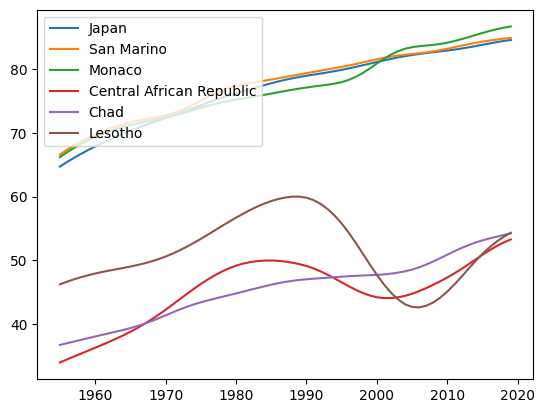

In [109]:
lifegovJapan = lifegov.query("Entity == 'Japan'")
lifegovJapan = lifegovJapan[['Year', 'Life expectancy']].sort_values(by='Year')
lifegovJapan

fig, axis = plt.subplots()
#axis.plot(lifegovJapan['Year'], lifegovJapan['Life expectancy'])
for salis in ilgiausi['Entity']:
    atrinkta_salis = lifegov.query("Entity == @salis")[['Year', 'Life expectancy']].sort_values(by='Year')
    axis.plot(atrinkta_salis['Year'], atrinkta_salis['Life expectancy'], label=salis)

for salis in trumpiausi['Entity']:
    atrinkta_salis = lifegov.query("Entity == @salis")[['Year', 'Life expectancy']].sort_values(by='Year')
    axis.plot(atrinkta_salis['Year'], atrinkta_salis['Life expectancy'], label=salis)


axis.legend(loc='upper left')



In [33]:
# Nuskaitykite auto.csv failą.
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

auto = pd.read_csv('auto.csv', sep='|')
auto.head()

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
1,1,ID:23120069,Mitsubishi,Outlander,2006,195 405 km,"2378 cm³, 160 AG (118kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
2,2,ID:23012308,Seat,Arona,2019-11,129 800 km,"1598 cm³, 95 AG (70kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
3,3,ID:23051810,Skoda,Octavia Scout,2015-06,183 000 km,"1798 cm³, 179 AG (132kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
4,4,ID:23117259,Volvo,XC90,2018-08,127 896 km,"1969 cm³, 235 AG (173kW)",Dyzelinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [34]:
auto.columns

Index(['index', 'id', 'gamintojas', 'modelis', 'pagaminimo_data', 'rida',
       'variklis', 'kuro_tipas', 'varantieji_ratai', 'pavaros',
       ...
       'service_book', 'warranty', 'catalytic_converter', 'multiple_key_sets',
       'double_wheels', 'folding_seats', 'insulated_glass',
       'two_sliding_doors', 'personal_ventilation', 'personal_illumination'],
      dtype='object', length=115)

In [36]:
auto2 = auto[['gamintojas', 'price', 'pagaminimo_data']]   # taip sumazinama lentele
auto2

,gamintojas,price,pagaminimo_data
0,BMW,19 500,2005-12
1,Mitsubishi,2 700,2006
2,Seat,13 490,2019-11
3,Skoda,14 650,2015-06
4,Volvo,38 000,2018-08
...,...,...,...
2395,Volvo,2 250,2006-06
2396,Opel,2 250,2006-10
2397,Volkswagen,2 250,2007-06
2398,Audi,2 250,2006-10


In [61]:
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.
def konvertuotakaina(eurai):
    auto2 = float(eurai.replace(' ', ''))
    return auto2

auto2['Kaina'] = auto2['price'].apply(konvertuotakaina)

vidkaina = auto2.groupby(by='gamintojas')['Kaina'].mean().sort_values(ascending=False)  #
print(vidkaina.head(), vidkaina.tail())

# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

def konvertuotadata(konvertuojam):
    konvertacijadatos = float(konvertuojam[:4])
    return konvertacijadatos

auto2['DATA'] = auto2['pagaminimo_data'].apply(konvertuotadata)
auto2.head()
vidamzius = auto2.groupby(by='gamintojas')['DATA'].mean().sort_values()
print(vidamzius.tail())


gamintojas
Aston Martin    125000.000000
Porsche          61999.900000
Tesla            45666.666667
Land Rover       40925.000000
Maserati         34950.000000
Name: Kaina, dtype: float64 gamintojas
UAZ       1850.0
Suzuki    1820.0
Smart     1649.0
Lada      1350.0
Isuzu      850.0
Name: Kaina, dtype: float64
gamintojas
Porsche       2015.800000
Maserati      2017.000000
Land Rover    2017.250000
Tesla         2018.111111
Ligier        2021.000000
Name: DATA, dtype: float64


In [ ]:
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.

In [3]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')
d14s = dus14[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']] #sukuriama mazesne lentele
d18s = dus18[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']] #sukuriama mazesne lentele
d18s.head()

vidatlyginimas14 = d14s.groupby(by='issilavinimas')['bdu_spalio'].mean().sort_values() /3.4528
vidatlyginimas18 = d18s.groupby(by='issilavinimas')['bdu_spalio'].mean().sort_values() 

print('vidutinis atlyginimus pagal išsilavinimo pakopą 2014 metais', vidatlyginimas14, 'vidutinis atlyginimus pagal išsilavinimo pakopą 2018 metais', vidatlyginimas18)

lentele2014 = vidatlyginimas14.reset_index()
lentele2014

vidutinis atlyginimus pagal išsilavinimo pakopą 2014 metais issilavinimas
G1     474.744650
G2     543.892581
G3     730.410678
G4    1011.965397
Name: bdu_spalio, dtype: float64 vidutinis atlyginimus pagal išsilavinimo pakopą 2018 metais issilavinimas
G1     626.391679
G2     732.687157
G3    1094.764026
G4    1246.451196
Name: bdu_spalio, dtype: float64


,issilavinimas,bdu_spalio
0,G1,474.744650
1,G2,543.892581
2,G3,730.410678
3,G4,1011.965397


In [4]:
lentele2018 = vidatlyginimas18.reset_index()
lentele2018

,issilavinimas,bdu_spalio
0,G1,626.391679
1,G2,732.687157
2,G3,1094.764026
3,G4,1246.451196


In [5]:
d14s

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962
...,...,...,...,...,...
44947,F,50-59,G4,3393.00,235
44948,F,30-39,G4,3639.67,233
44949,F,50-59,G4,3670.00,231
44950,F,30-39,G4,4212.00,231


In [15]:
atlyginimai2014ir2018 = pd.merge(left=lentele2014, right=lentele2018, left_on='issilavinimas', right_on='issilavinimas', how='inner')
atlyginimai2014ir2018.head()
atlyginimai2014ir2018['Skirtumas'] = ((atlyginimai2014ir2018['bdu_spalio_y'] - atlyginimai2014ir2018['bdu_spalio_x'])/atlyginimai2014ir2018['bdu_spalio_x']) * 100
atlyginimai2014ir2018.head()


,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skirtumas
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [13]:
#REMIGIJAUS SPRENDIMAS 
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2014 ir 2018 metų, procentais.
dus14 = pd.read_csv("dus2014.csv")[['issilavinimas', 'bdu_spalio']]
dus14['bdu_spalio'] = dus14['bdu_spalio']/3.4528
dus18 = pd.read_csv("dus2018.csv")[['issilavinimas', 'bdu_spalio']]
dus14Vid = dus14.groupby('issilavinimas').mean().reset_index()
dus18Vid = dus18.groupby('issilavinimas').mean().reset_index()
dus14Ir18Vid = pd.merge(left=dus14Vid, right=dus18Vid, left_on="issilavinimas", right_on='issilavinimas', how='inner')
dus14Ir18Vid['Skirtumas'] = ((dus14Ir18Vid['bdu_spalio_y'] - dus14Ir18Vid['bdu_spalio_x'])/dus14Ir18Vid['bdu_spalio_x']) * 100
dus14Ir18Vid.head()

,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skirtumas
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [ ]:
# #suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais,
# atsižvelgdami į amžiaus grupes
